In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft2, ifft2, fftshift, ifftshift
import cv2

In [2]:
# Hàm đọc tệp nhị phân
def read_binary_image(file_path, size=(256, 256)):
    return np.fromfile(file_path, dtype=np.uint8).reshape(size)

def show_image(title, image):
    plt.figure(figsize=(6, 6))
    plt.title(title)
    if len(image.shape) == 2:
        plt.imshow(image, cmap='gray')
    else: 
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

def save_image(data, filename, cmap='gray', vmin=None, vmax=None):
    plt.figure()
    plt.imshow(data, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.axis('off')
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()  

def ideal_low_pass_filter(size, cutoff):
    """Tạo bộ lọc thông thấp lý tưởng."""
    u, v = np.meshgrid(np.arange(-size//2, size//2), np.arange(-size//2, size//2))
    h_tilde_center = np.sqrt(u**2 + v**2) <= cutoff
    return fftshift(h_tilde_center.astype(float))

def apply_filter(image, filter_h):
    """Áp dụng bộ lọc thông thấp trong miền tần số."""
    dft_image = fft2(image)
    dft_filtered = dft_image * filter_h
    filtered_image = np.real(ifft2(dft_filtered))
    return filtered_image

def isnr(original, noisy, denoised):
    """Tính ISNR giữa ảnh nhiễu và ảnh đã khử nhiễu."""
    mse_noisy = np.mean((original - noisy) ** 2)
    mse_denoised = np.mean((original - denoised) ** 2)
    return 10 * np.log10(mse_noisy / mse_denoised)

def mse(image1, image2):
    """Tính Mean Squared Error (MSE) giữa hai ảnh."""
    diff = image1.astype(np.float32) - image2.astype(np.float32)
    mse_value = np.mean(diff ** 2)
    return mse_value

In [3]:
# Kích thước và cutoff frequency
size = 256
cutoff = 64

In [4]:
# Tạo bộ lọc thông thấp lý tưởng
h_ideal = ideal_low_pass_filter(size, cutoff)

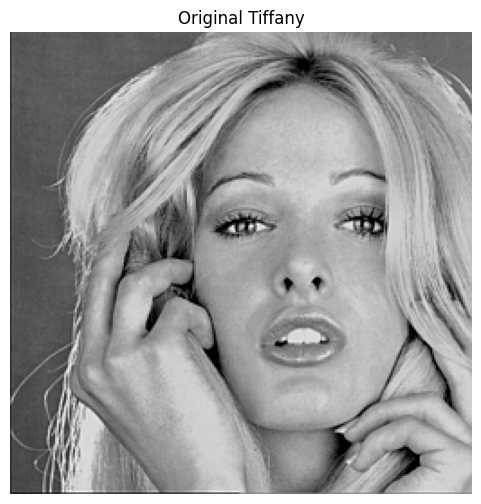

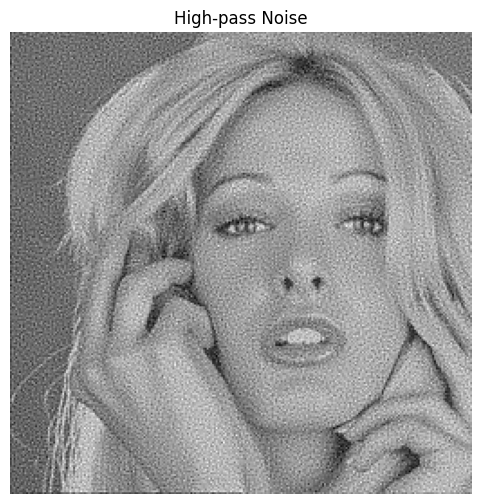

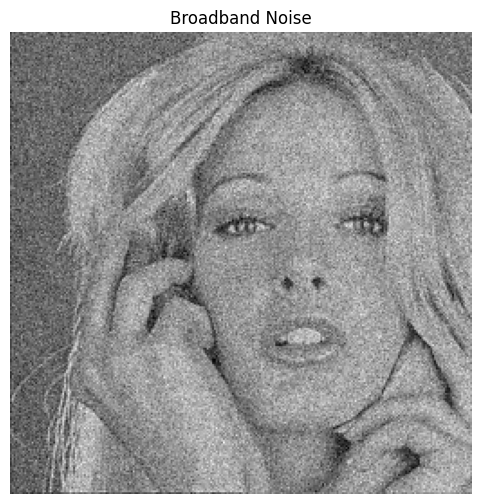

In [5]:
# Đọc hình ảnh
images = dict()

img_1 = read_binary_image("../../data/girl2bin.sec")
show_image("Original Tiffany", img_1)
save_image(img_1, "origianl_tiffany")
images ["Original"] = img_1

img_2 = read_binary_image("../../data/girl2Noise32Hibin.sec")
show_image("High-pass Noise", img_2)
save_image(img_1, "girl2Noise32Hi.png")
images ["High-pass Noise"] = img_2

img_3 = read_binary_image("../../data/girl2Noise32bin.sec")
show_image("Broadband Noise", img_3)
save_image(img_3, "girl2Noise32.png")
images ["Broadband Noise"] = img_3

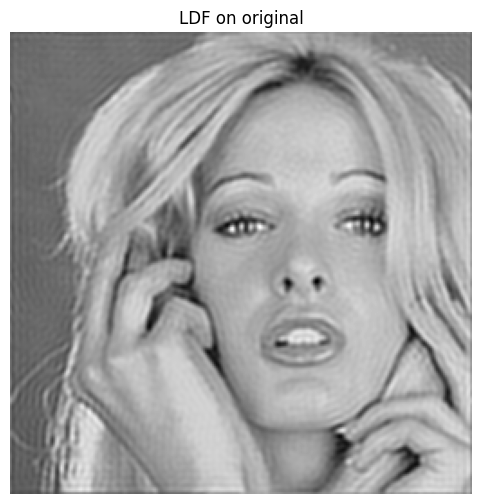

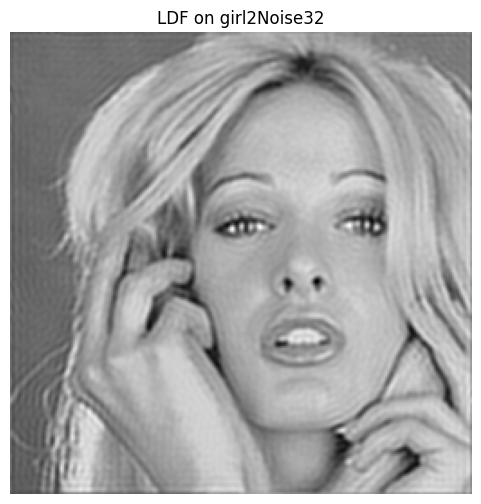

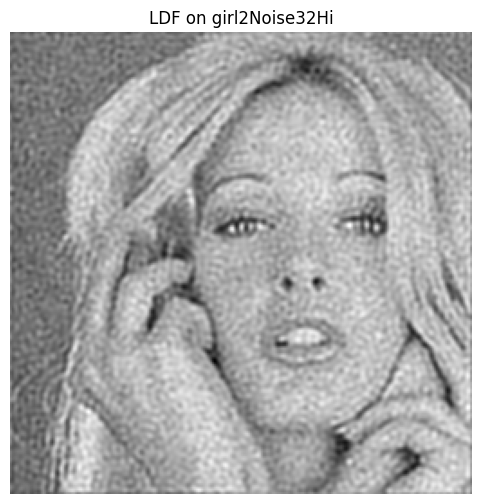

In [6]:
# Áp dụng bộ lọc cho từng ảnh
girl2_filtered = apply_filter(img_1, h_ideal)
show_image("LDF on original", girl2_filtered)
save_image(girl2_filtered, "LDF_orginal.png")

girl2Noise32_filtered = apply_filter(img_2, h_ideal)
show_image("LDF on girl2Noise32", girl2Noise32_filtered)
save_image(girl2Noise32_filtered, "LDF_girl2noise32.png")

girl2Noise32Hi_filtered = apply_filter(img_3, h_ideal)
show_image("LDF on girl2Noise32Hi", girl2Noise32Hi_filtered)
save_image(girl2Noise32Hi_filtered, "LDF_girl2noise32Hi.png")

In [7]:
# Tính MSE
mse_girl2_filtered = mse(img_1, girl2_filtered)
mse_girl2Noise32_filtered = mse(img_1, girl2Noise32_filtered)
mse_girl2Noise32Hi_filtered = mse(img_1, girl2Noise32Hi_filtered)

In [8]:
# Tính ISNR
isnr_girl2Noise32 = isnr(img_1, img_3, girl2Noise32_filtered)
isnr_girl2Noise32Hi = isnr(img_1, img_2, girl2Noise32Hi_filtered)

In [9]:
# Hiển thị kết quả
print(f"MSE (girl2 filtered): {mse_girl2_filtered:.4f}")
print(f"MSE (girl2Noise32 filtered): {mse_girl2Noise32_filtered:.4f}")
print(f"MSE (girl2Noise32Hi filtered): {mse_girl2Noise32Hi_filtered:.4f}")
print(f"ISNR (girl2Noise32): {isnr_girl2Noise32:.4f} dB")
print(f"ISNR (girl2Noise32Hi): {isnr_girl2Noise32Hi:.4f} dB")

MSE (girl2 filtered): 127.7481
MSE (girl2Noise32 filtered): 398.9978
MSE (girl2Noise32Hi filtered): 550.8787
ISNR (girl2Noise32): -6.1478 dB
ISNR (girl2Noise32Hi): -7.6277 dB
